In [ ]:
#importing required libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import random
import math
import matplotlib.pyplot as plt
import zipfile


# 1. Getting the Data
We are going to use [Kaggle's Intel Image Classification Challenge](https://www.kaggle.com/puneet6060/intel-image-classification). I uploaded this dataset to my google drive so it can be downloaded with linux shell "wget" command. You can run any shell command from within jupyter notebook by putting the "!" mark before that command.

In [ ]:
# downloading the files from dropbox. This will download cats-vs-dogs zipfile into your machine
!wget --no-check-certificate  "https://drive.google.com/file/d/1CMiTTVfEoMJ0FZorE08ZWBt2i2pWLSEC/view?usp=sharing" -O intel-challenge.zip

#extract the zip file downloaded
zip_ref = zipfile.ZipFile('intel-challenge.zip', 'r')
zip_ref.extractall()

--2022-10-21 00:38:09--  https://uofi.box.com/shared/static/5tp2foxit52byt2zh9eqnnd8oi3ac9ym.zip
Resolving uofi.box.com (uofi.box.com)... 74.112.186.144
Connecting to uofi.box.com (uofi.box.com)|74.112.186.144|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /public/static/5tp2foxit52byt2zh9eqnnd8oi3ac9ym.zip [following]
--2022-10-21 00:38:09--  https://uofi.box.com/public/static/5tp2foxit52byt2zh9eqnnd8oi3ac9ym.zip
Reusing existing connection to uofi.box.com:443.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://uofi.app.box.com/public/static/5tp2foxit52byt2zh9eqnnd8oi3ac9ym.zip [following]
--2022-10-21 00:38:09--  https://uofi.app.box.com/public/static/5tp2foxit52byt2zh9eqnnd8oi3ac9ym.zip
Resolving uofi.app.box.com (uofi.app.box.com)... 74.112.186.144
Connecting to uofi.app.box.com (uofi.app.box.com)|74.112.186.144|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://dl2.boxcloud

# 2. Preparing the data


##2.1 Checking the balance of the data

##2.2 Split training data into training and validation data

In [ ]:
import os,shutil

print('total training building images:', len(os.listdir('intel/seg_train/buildings/')))
print('total training forest images:', len(os.listdir('intel/seg_train/forest/')))
print('total training glacier images:', len(os.listdir('intel/seg_train/glacier/')))
print('total training mountain images:', len(os.listdir('intel/seg_train/mountain/')))
print('total training sea images:', len(os.listdir('intel/seg_train/sea/')))
print('total training street images:', len(os.listdir('intel/seg_train/street/')))
print('total test building images:', len(os.listdir('intel/seg_test/buildings/')))
print('total test forest images:', len(os.listdir('intel/seg_test/forest/')))
print('total test glacier images:', len(os.listdir('intel/seg_test/glacier/')))
print('total test mountain images:', len(os.listdir('intel/seg_test/mountain/')))
print('total test sea images:', len(os.listdir('intel/seg_test/sea/')))
print('total test street images:', len(os.listdir('intel/seg_test/street/')))

total training building images: 2191
total training forest images: 2271
total training glacier images: 2404
total training mountain images: 2512
total training sea images: 2274
total training street images: 2382
total test building images: 437
total test forest images: 474
total test glacier images: 553
total test mountain images: 525
total test sea images: 510
total test street images: 501


Data is pretty well balanced with no category excessively under or over represented.

####Split 20% of training data into validation data

In [ ]:
os.mkdir('intel/seg_val')
os.mkdir('intel/seg_val/buildings')
os.mkdir('intel/seg_val/forest')
os.mkdir('intel/seg_val/glacier')
os.mkdir('intel/seg_val/mountain')
os.mkdir('intel/seg_val/sea')
os.mkdir('intel/seg_val/street')

In [ ]:
# move buildings files
source = 'intel/seg_train/buildings/'
dest = 'intel/seg_val/buildings/'
files = os.listdir(source)
no_of_files = round(0.2*len(files))

for file_name in random.sample(files, no_of_files):
  shutil.move(os.path.join(source, file_name), dest)

# move forest files
source = 'intel/seg_train/forest/'
dest = 'intel/seg_val/forest/'
files = os.listdir(source)
no_of_files = round(0.2*len(files))

for file_name in random.sample(files, no_of_files):
  shutil.move(os.path.join(source, file_name), dest)

 # move glacier files
source = 'intel/seg_train/glacier/'
dest = 'intel/seg_val/glacier/'
files = os.listdir(source)
no_of_files = round(0.2*len(files))

for file_name in random.sample(files, no_of_files):
  shutil.move(os.path.join(source, file_name), dest)

 # move mountain files
source = 'intel/seg_train/mountain/'
dest = 'intel/seg_val/mountain/'
files = os.listdir(source)
no_of_files = round(0.2*len(files))

for file_name in random.sample(files, no_of_files):
  shutil.move(os.path.join(source, file_name), dest)

 # move sea files
source = 'intel/seg_train/sea/'
dest = 'intel/seg_val/sea/'
files = os.listdir(source)
no_of_files = round(0.2*len(files))

for file_name in random.sample(files, no_of_files):
  shutil.move(os.path.join(source, file_name), dest)

 # move street files
source = 'intel/seg_train/street/'
dest = 'intel/seg_val/street/'
files = os.listdir(source)
no_of_files = round(0.2*len(files))

for file_name in random.sample(files, no_of_files):
  shutil.move(os.path.join(source, file_name), dest)      


Split Check

In [ ]:
print('total training building images:', len(os.listdir('intel/seg_train/buildings/')))
print('total training forest images:', len(os.listdir('intel/seg_train/forest/')))
print('total training glacier images:', len(os.listdir('intel/seg_train/glacier/')))
print('total training mountain images:', len(os.listdir('intel/seg_train/mountain/')))
print('total training sea images:', len(os.listdir('intel/seg_train/sea/')))
print('total training street images:', len(os.listdir('intel/seg_train/street/')))

print('total validation building images:', len(os.listdir('intel/seg_val/buildings/')))
print('total validation forest images:', len(os.listdir('intel/seg_val/forest/')))
print('total validation glacier images:', len(os.listdir('intel/seg_val/glacier/')))
print('total validation mountain images:', len(os.listdir('intel/seg_val/mountain/')))
print('total validation sea images:', len(os.listdir('intel/seg_val/sea/')))
print('total validation street images:', len(os.listdir('intel/seg_val/street/')))

print('total test building images:', len(os.listdir('intel/seg_test/buildings/')))
print('total test forest images:', len(os.listdir('intel/seg_test/forest/')))
print('total test glacier images:', len(os.listdir('intel/seg_test/glacier/')))
print('total test mountain images:', len(os.listdir('intel/seg_test/mountain/')))
print('total test sea images:', len(os.listdir('intel/seg_test/sea/')))
print('total test street images:', len(os.listdir('intel/seg_test/street/')))

total training building images: 1753
total training forest images: 1817
total training glacier images: 1923
total training mountain images: 2010
total training sea images: 1819
total training street images: 1906
total validation building images: 438
total validation forest images: 454
total validation glacier images: 481
total validation mountain images: 502
total validation sea images: 455
total validation street images: 476
total test building images: 437
total test forest images: 474
total test glacier images: 553
total test mountain images: 525
total test sea images: 510
total test street images: 501


## Converting Images to Tensorflow Dataset

In [ ]:
from tensorflow.keras.preprocessing import image_dataset_from_directory
train_dataset = image_dataset_from_directory(
"intel/seg_train",
image_size=(150, 150),
batch_size=32)


validation_dataset = image_dataset_from_directory(
"intel/seg_val",
image_size=(150, 150),
batch_size=32)


#test_dataset = image_dataset_from_directory(
#"intel/seg_test",
#image_size=(150, 150),
#batch_size=32)

Found 11228 files belonging to 6 classes.
Found 2806 files belonging to 6 classes.


#Create Baseline Model

In [ ]:
#setting the random seeds for  python, numpy, and tensorflow for the purpose of reproducibility. 
random.seed(123)
np.random.seed(123)
tf.random.set_seed(123)

def build_baseline(input_shape, filters):

  #Configuring the model architecture

  #input layer for getting the input image
  input = keras.Input(shape=input_shape)

  #rescaling layer for rescalign pixels to [0,1] range
  x = layers.experimental.preprocessing.Rescaling(1./255)(input)


  for filter in filters:
    #A block of one conv+batchnorm+relu  layers for extractign features
    x =layers.Conv2D(filters=filter, kernel_size=3, padding="same", use_bias=False)(x)
    x= layers.BatchNormalization()(x)
    x= layers.ReLU()(x)

    #max pooling for downsampling
    x = layers.MaxPooling2D(pool_size=2, padding="same")(x)

  #Global Average pooling. This will get an input of shape (height, width, channels) the average of each feature map and returns a vector of size channels.
  x = layers.GlobalAveragePooling2D()(x)

  #The final output layer has one neuron with sigmoid activation to output the probability of the target class ( cate or dog whichever is labled as one)
  output=layers.Dense(6, activation="softmax")(x)
  #create a model and set its input and output and return it
  model = keras.Model(inputs=input, outputs=output)
  return model
baseline=build_baseline(input_shape=(150,150,3), filters=[32,64,128, 256])
print(baseline.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 150, 150, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 150, 150, 32)      864       
                                                                 
 batch_normalization (BatchN  (None, 150, 150, 32)     128       
 ormalization)                                                   
                                                                 
 re_lu (ReLU)                (None, 150, 150, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                           

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-3,
    decay_steps=1000,
    decay_rate=0.9)

#compiling the model
opt = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
baseline.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics=['accuracy'], optimizer=opt)

#callback for early stopping. stop the training if the validation_loss does not improve after 10 epochs
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, min_delta=1e-4, restore_best_weights=True)

#save the checkpointed model in your google drive cnn_lab directory: "drive/MyDrive/cnn_lab/baseline_checkpoint" . 
checkpoint= keras.callbacks.ModelCheckpoint( filepath="drive/MyDrive/cnn_assign3/baseline_checkpoint",save_best_only=True, monitor="val_loss")

history = baseline.fit(
            train_dataset,
            validation_data = validation_dataset,
            epochs = 50,
            verbose = 1,
            callbacks=[early_stopping, checkpoint])

#save history
np.save('drive/MyDrive/cnn_assign3/baseline_checkpoint/history.npy', history)


Epoch 1/50
351/351 [==============================] - ETA: 0s - loss: 0.7779 - accuracy: 0.7090

351/351 [==============================] - 18s 22ms/step - loss: 0.7779 - accuracy: 0.7090 - val_loss: 1.7833 - val_accuracy: 0.4715
Epoch 2/50
349/351 [============================>.] - ETA: 0s - loss: 0.5923 - accuracy: 0.7797

351/351 [==============================] - 7s 21ms/step - loss: 0.5935 - accuracy: 0.7791 - val_loss: 1.1183 - val_accuracy: 0.5706
Epoch 3/50
351/351 [==============================] - 6s 16ms/step - loss: 0.5341 - accuracy: 0.8044 - val_loss: 1.4821 - val_accuracy: 0.5560
Epoch 4/50
348/351 [============================>.] - ETA: 0s - loss: 0.4897 - accuracy: 0.8201

351/351 [==============================] - 7s 21ms/step - loss: 0.4896 - accuracy: 0.8200 - val_loss: 0.7001 - val_accuracy: 0.7224
Epoch 5/50
351/351 [==============================] - 6s 16ms/step - loss: 0.4522 - accuracy: 0.8351 - val_loss: 0.8916 - val_accuracy: 0.7042
Epoch 6/50
351/351 [==============================] - 5s 15ms/step - loss: 0.4322 - accuracy: 0.8432 - val_loss: 3.2525 - val_accuracy: 0.3721
Epoch 7/50
350/351 [============================>.] - ETA: 0s - loss: 0.4090 - accuracy: 0.8521

351/351 [==============================] - 7s 20ms/step - loss: 0.4089 - accuracy: 0.8522 - val_loss: 0.6731 - val_accuracy: 0.7630
Epoch 8/50
351/351 [==============================] - 5s 15ms/step - loss: 0.3877 - accuracy: 0.8589 - val_loss: 1.2242 - val_accuracy: 0.6269
Epoch 9/50
350/351 [============================>.] - ETA: 0s - loss: 0.3658 - accuracy: 0.8666

351/351 [==============================] - 7s 21ms/step - loss: 0.3659 - accuracy: 0.8667 - val_loss: 0.4224 - val_accuracy: 0.8482
Epoch 10/50
351/351 [==============================] - 6s 16ms/step - loss: 0.3474 - accuracy: 0.8742 - val_loss: 0.5941 - val_accuracy: 0.8040
Epoch 11/50
351/351 [==============================] - 5s 15ms/step - loss: 0.3409 - accuracy: 0.8768 - val_loss: 0.9900 - val_accuracy: 0.6700
Epoch 12/50
351/351 [==============================] - 5s 15ms/step - loss: 0.3228 - accuracy: 0.8853 - val_loss: 0.6869 - val_accuracy: 0.7502
Epoch 13/50
351/351 [==============================] - 5s 15ms/step - loss: 0.3026 - accuracy: 0.8929 - val_loss: 0.4347 - val_accuracy: 0.8411
Epoch 14/50
348/351 [============================>.] - ETA: 0s - loss: 0.2951 - accuracy: 0.8950

351/351 [==============================] - 7s 21ms/step - loss: 0.2943 - accuracy: 0.8951 - val_loss: 0.3825 - val_accuracy: 0.8624
Epoch 15/50
351/351 [==============================] - 5s 15ms/step - loss: 0.2780 - accuracy: 0.9027 - val_loss: 0.6708 - val_accuracy: 0.7612
Epoch 16/50
351/351 [==============================] - 6s 16ms/step - loss: 0.2708 - accuracy: 0.9045 - val_loss: 0.5988 - val_accuracy: 0.8001
Epoch 17/50
351/351 [==============================] - 5s 15ms/step - loss: 0.2555 - accuracy: 0.9107 - val_loss: 0.4657 - val_accuracy: 0.8475
Epoch 18/50
351/351 [==============================] - 6s 16ms/step - loss: 0.2547 - accuracy: 0.9066 - val_loss: 0.4541 - val_accuracy: 0.8414
Epoch 19/50
351/351 [==============================] - 5s 15ms/step - loss: 0.2395 - accuracy: 0.9142 - val_loss: 0.3837 - val_accuracy: 0.8589
Epoch 20/50
351/351 [==============================] - 5s 15ms/step - loss: 0.2325 - accuracy: 0.9155 - val_loss: 0.5344 - val_accuracy: 0.8200
Epoc

351/351 [==============================] - 7s 21ms/step - loss: 0.2156 - accuracy: 0.9255 - val_loss: 0.3371 - val_accuracy: 0.8838
Epoch 23/50
351/351 [==============================] - 6s 16ms/step - loss: 0.2012 - accuracy: 0.9314 - val_loss: 0.3606 - val_accuracy: 0.8710
Epoch 24/50
351/351 [==============================] - 6s 16ms/step - loss: 0.1875 - accuracy: 0.9334 - val_loss: 0.4246 - val_accuracy: 0.8489
Epoch 25/50
351/351 [==============================] - 6s 16ms/step - loss: 0.1839 - accuracy: 0.9367 - val_loss: 0.4553 - val_accuracy: 0.8386
Epoch 26/50
349/351 [============================>.] - ETA: 0s - loss: 0.1735 - accuracy: 0.9405

351/351 [==============================] - 8s 22ms/step - loss: 0.1733 - accuracy: 0.9406 - val_loss: 0.3296 - val_accuracy: 0.8824
Epoch 27/50
351/351 [==============================] - 6s 16ms/step - loss: 0.1732 - accuracy: 0.9415 - val_loss: 0.4324 - val_accuracy: 0.8478
Epoch 28/50
351/351 [==============================] - 5s 15ms/step - loss: 0.1547 - accuracy: 0.9495 - val_loss: 0.5164 - val_accuracy: 0.8211
Epoch 29/50
351/351 [==============================] - 5s 15ms/step - loss: 0.1505 - accuracy: 0.9476 - val_loss: 0.5330 - val_accuracy: 0.8147
Epoch 30/50
351/351 [==============================] - 5s 15ms/step - loss: 0.1460 - accuracy: 0.9500 - val_loss: 0.4641 - val_accuracy: 0.8421
Epoch 31/50
351/351 [==============================] - 5s 15ms/step - loss: 0.1371 - accuracy: 0.9548 - val_loss: 0.6073 - val_accuracy: 0.7972
Epoch 32/50
351/351 [==============================] - 5s 15ms/step - loss: 0.1284 - accuracy: 0.9583 - val_loss: 0.5750 - val_accuracy: 0.8122
Epoc

In [ ]:
# Load History, if timed out
history=np.load('drive/MyDrive/cnn_assign3/baseline_checkpoint/history.npy',allow_pickle='TRUE').item()



##Model fit and Eval

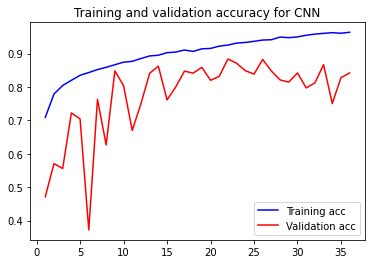

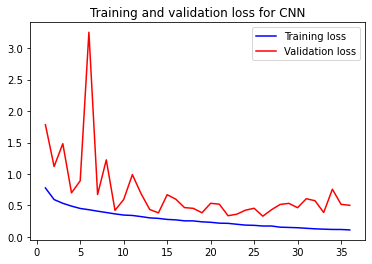

In [ ]:
#getting train and validation accuracies
train_acc_CNN = history.history['accuracy']
val_acc_CNN = history.history['val_accuracy']

#getting train and validation losses
train_loss_CNN = history.history['loss']
val_loss_CNN = history.history['val_loss']
epochs = range(1, len(train_loss_CNN) + 1)

#plotting the training and validation accurracies
plt.plot(epochs, train_acc_CNN, 'b', label='Training acc')
plt.plot(epochs, val_acc_CNN, 'r', label='Validation acc')
plt.title('Training and validation accuracy for CNN')
plt.legend()
plt.figure()

#plotting the train and validation losses
plt.plot(epochs, train_loss_CNN, 'b', label='Training loss')
plt.plot(epochs, val_loss_CNN, 'r', label='Validation loss')
plt.title('Training and validation loss for CNN')
plt.legend()

plt.show()

i. The learning curves show characterisics of overfitting. The training accuracy is near 97%, whereas validation accuracy bounces and peaks around 88%. The validation loss reaches its min after about 21 epochs and bounces around whereas the training loss keeps decreasing linearly as training proceeds.

ii. The model is overfitting


##iii. Depth-wise model w Residual Blocks

In [ ]:
def residual_block(x, filter):
  
  residual = x
  # x goes through a block consisting of two conv2d+batchnorm+reul as well as a max pooling

  x = layers.SeparableConv2D(filters=filter, kernel_size=3, padding="same", use_bias=False )(x)
  x = layers.BatchNormalization()(x)
  x = layers.ReLU()(x)

  x = layers.SeparableConv2D(filters=filter, kernel_size=3, padding="same", use_bias=False)(x)
  x = layers.BatchNormalization()(x)
  x = layers.ReLU()(x)

  x = layers.MaxPooling2D(pool_size=2, padding="same")(x)
  
  # After going through the above block x now has "filter" channels and its feature map is downsampled to half by max pooling
  #so we need to use a 1*1 convolution with stride=2 to downsample residual and change its numebr of channels to "filter".
  residual = layers.Conv2D(filters=filter, kernel_size=1, strides=2, use_bias=False)(residual)
  
  #Having batchnormalization layer as usual after convolution
  residual= layers.BatchNormalization()(residual)


  x = layers.add([x, residual])
  return x

In [ ]:
def build_baseline(input_shape, filters):


  #input layer for getting the input image
  input = keras.Input(shape=input_shape)
  x = input
  #rescaling layer for rescalign pixels to [0,1] range
  x = layers.experimental.preprocessing.Rescaling(1./255)(x)

  # stack a set of residual blocks
  for filter in filters:
    x= residual_block(x, filter)

  #Global Average pooling. This will get an input of shape (height, width, channels) the average of each feature map and returns a vector of size channels.
  x = layers.GlobalAveragePooling2D()(x)

  
  #The final output layer has six neurons with softmax activation to output the probability of the target class
  output=layers.Dense(6, activation="softmax")(x)
  
  #create a model and set its input and output and return it
  model = keras.Model(inputs=input, outputs=output)
  return model

baseline_improved=build_baseline(input_shape=(150,150,3), filters=[32,64,128,256, 512])
print(baseline_improved.summary())

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_1 (Rescaling)        (None, 150, 150, 3)  0           ['input_2[0][0]']                
                                                                                                  
 separable_conv2d (SeparableCon  (None, 150, 150, 32  123        ['rescaling_1[0][0]']            
 v2D)                           )                                                                 
                                                                                            

In [ ]:
#compiling the model
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-3,
    decay_steps=1000,
    decay_rate=0.9)
opt = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
baseline_improved.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics=['accuracy'], optimizer=opt)

checkpoint= keras.callbacks.ModelCheckpoint( filepath="drive/MyDrive/cnn_assign3/baseline_improved_checkpoint",save_best_only=True, monitor="val_loss")

history = baseline_improved.fit(
            train_dataset,
            validation_data = validation_dataset,
            epochs = 50,
            verbose = 1,
            callbacks=[checkpoint])

#save history
np.save('drive/MyDrive/cnn_assign3/baseline_improved_checkpoint/history.npy', history)

Epoch 1/50
351/351 [==============================] - ETA: 0s - loss: 0.8239 - accuracy: 0.6975

351/351 [==============================] - 99s 276ms/step - loss: 0.8239 - accuracy: 0.6975 - val_loss: 3.9185 - val_accuracy: 0.1622
Epoch 2/50
351/351 [==============================] - ETA: 0s - loss: 0.5179 - accuracy: 0.8121

351/351 [==============================] - 96s 275ms/step - loss: 0.5179 - accuracy: 0.8121 - val_loss: 0.5604 - val_accuracy: 0.8001
Epoch 3/50
351/351 [==============================] - 91s 259ms/step - loss: 0.4075 - accuracy: 0.8554 - val_loss: 0.6701 - val_accuracy: 0.7837
Epoch 4/50
351/351 [==============================] - 90s 257ms/step - loss: 0.3368 - accuracy: 0.8815 - val_loss: 0.6253 - val_accuracy: 0.7929
Epoch 5/50
351/351 [==============================] - 91s 258ms/step - loss: 0.2840 - accuracy: 0.8968 - val_loss: 0.5769 - val_accuracy: 0.8086
Epoch 6/50
351/351 [==============================] - 90s 257ms/step - loss: 0.2218 - accuracy: 0.9231 - val_loss: 0.7198 - val_accuracy: 0.7712
Epoch 7/50
351/351 [==============================] - ETA: 0s - loss: 0.1821 - accuracy: 0.9367

351/351 [==============================] - 97s 276ms/step - loss: 0.1821 - accuracy: 0.9367 - val_loss: 0.4651 - val_accuracy: 0.8478
Epoch 8/50
351/351 [==============================] - 90s 257ms/step - loss: 0.1329 - accuracy: 0.9556 - val_loss: 0.7148 - val_accuracy: 0.8001
Epoch 9/50
351/351 [==============================] - 90s 256ms/step - loss: 0.1032 - accuracy: 0.9665 - val_loss: 0.7111 - val_accuracy: 0.8104
Epoch 10/50
351/351 [==============================] - 90s 256ms/step - loss: 0.0876 - accuracy: 0.9711 - val_loss: 0.7009 - val_accuracy: 0.8193
Epoch 11/50
351/351 [==============================] - 90s 257ms/step - loss: 0.0694 - accuracy: 0.9795 - val_loss: 0.7097 - val_accuracy: 0.8136
Epoch 12/50
351/351 [==============================] - 90s 258ms/step - loss: 0.0625 - accuracy: 0.9816 - val_loss: 0.6877 - val_accuracy: 0.8279
Epoch 13/50
351/351 [==============================] - 90s 256ms/step - loss: 0.0649 - accuracy: 0.9798 - val_loss: 0.5445 - val_accuracy:

In [ ]:
# Load History, if timed out
history=np.load('drive/MyDrive/cnn_assign3/baseline_improved_checkpoint/history.npy',allow_pickle='TRUE').item()

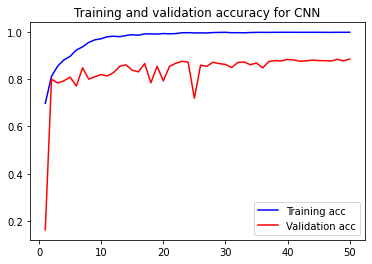

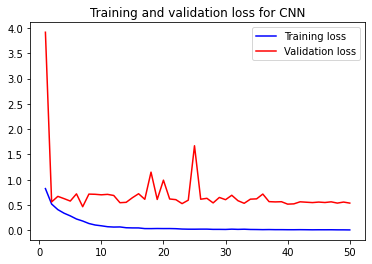

In [ ]:
#getting train and validation accuracies
train_acc_CNN = history.history['accuracy']
val_acc_CNN = history.history['val_accuracy']

#getting train and validation losses
train_loss_CNN = history.history['loss']
val_loss_CNN = history.history['val_loss']
epochs = range(1, len(train_loss_CNN) + 1)

#plotting the training and validation accurracies
plt.plot(epochs, train_acc_CNN, 'b', label='Training acc')
plt.plot(epochs, val_acc_CNN, 'r', label='Validation acc')
plt.title('Training and validation accuracy for CNN')
plt.legend()
plt.figure()

#plotting the train and validation losses
plt.plot(epochs, train_loss_CNN, 'b', label='Training loss')
plt.plot(epochs, val_loss_CNN, 'r', label='Validation loss')
plt.title('Training and validation loss for CNN')
plt.legend()

plt.show()

Residual blocks and depth-wise separable convolutions did help to bring training accuracy and validation accuracy closer together with less bouncing around; the model does still overfit.

## iv. Data Augmentation

In [ ]:
def data_augmentation(x):
  x = layers.experimental.preprocessing.RandomFlip("horizontal")(x)
  x = layers.experimental.preprocessing.RandomRotation(0.1)(x)
  x = layers.experimental.preprocessing.RandomZoom(0.2)(x)
  return x

In [ ]:
def build_baseline_with_aug(input_shape, filters):


  # input layer for getting the input image
  input = keras.Input(shape=input_shape)
  
  # data augmentation layer
  x = data_augmentation(input)
  
  # rescaling layer for rescalign pixels to [0,1] range
  x = layers.experimental.preprocessing.Rescaling(1./255)(x)

  # stack a set of residual blocks
  for filter in filters:
    x = residual_block(x, filter)

  #Global Average pooling. This will get an input of shape (height, width, channels) the average of each feature map and returns a vector of size channels.
  x = layers.GlobalAveragePooling2D()(x)

  
  #The final output layer has six neurons with softmax activation to output the probability of the target class
  output=layers.Dense(6, activation="softmax")(x)
  
  #create a model and set its input and output and return it
  model = keras.Model(inputs=input, outputs=output)
  return model

baseline_with_aug = build_baseline(input_shape=(150,150,3), filters=[32,64,128,256, 512])
print(baseline_with_aug.summary())

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_2 (Rescaling)        (None, 150, 150, 3)  0           ['input_3[0][0]']                
                                                                                                  
 separable_conv2d_10 (Separable  (None, 150, 150, 32  123        ['rescaling_2[0][0]']            
 Conv2D)                        )                                                                 
                                                                                            

In [ ]:

#compiling the model
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-3,
    decay_steps=1000,
    decay_rate=0.9)

opt = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
baseline_with_aug.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics=['accuracy'], optimizer=opt)

checkpoint= keras.callbacks.ModelCheckpoint( filepath="drive/MyDrive/cnn_assign3/baseline_with_aug_checkpoint",save_best_only=True, monitor="val_loss")

history = baseline_with_aug.fit(
            train_dataset,
            validation_data = validation_dataset,
            epochs = 50,
            verbose = 1,
            callbacks=[checkpoint, early_stopping])

#save history
np.save('drive/MyDrive/cnn_assign3/baseline_with_aug_checkpoint/history.npy', history)


Epoch 1/50
351/351 [==============================] - ETA: 0s - loss: 0.8415 - accuracy: 0.6941

351/351 [==============================] - 97s 272ms/step - loss: 0.8415 - accuracy: 0.6941 - val_loss: 3.6344 - val_accuracy: 0.1622
Epoch 2/50
351/351 [==============================] - ETA: 0s - loss: 0.5518 - accuracy: 0.7982

351/351 [==============================] - 95s 269ms/step - loss: 0.5518 - accuracy: 0.7982 - val_loss: 0.8647 - val_accuracy: 0.7120
Epoch 3/50
351/351 [==============================] - 89s 253ms/step - loss: 0.4456 - accuracy: 0.8420 - val_loss: 1.0054 - val_accuracy: 0.6696
Epoch 4/50
351/351 [==============================] - ETA: 0s - loss: 0.3744 - accuracy: 0.8669

351/351 [==============================] - 95s 269ms/step - loss: 0.3744 - accuracy: 0.8669 - val_loss: 0.6204 - val_accuracy: 0.8033
Epoch 5/50
351/351 [==============================] - 89s 255ms/step - loss: 0.3114 - accuracy: 0.8887 - val_loss: 0.6783 - val_accuracy: 0.7869
Epoch 6/50
351/351 [==============================] - 89s 254ms/step - loss: 0.2470 - accuracy: 0.9113 - val_loss: 0.7465 - val_accuracy: 0.7619
Epoch 7/50
351/351 [==============================] - ETA: 0s - loss: 0.2011 - accuracy: 0.9317

351/351 [==============================] - 95s 270ms/step - loss: 0.2011 - accuracy: 0.9317 - val_loss: 0.4927 - val_accuracy: 0.8375
Epoch 8/50
351/351 [==============================] - 89s 255ms/step - loss: 0.1592 - accuracy: 0.9449 - val_loss: 0.5231 - val_accuracy: 0.8407
Epoch 9/50
351/351 [==============================] - 89s 252ms/step - loss: 0.1181 - accuracy: 0.9615 - val_loss: 0.6331 - val_accuracy: 0.8158
Epoch 10/50
351/351 [==============================] - 90s 255ms/step - loss: 0.0865 - accuracy: 0.9727 - val_loss: 0.6062 - val_accuracy: 0.8307
Epoch 11/50
351/351 [==============================] - 89s 252ms/step - loss: 0.0951 - accuracy: 0.9699 - val_loss: 0.5737 - val_accuracy: 0.8354
Epoch 12/50
351/351 [==============================] - 90s 255ms/step - loss: 0.0702 - accuracy: 0.9780 - val_loss: 0.6398 - val_accuracy: 0.8293
Epoch 13/50
351/351 [==============================] - 90s 255ms/step - loss: 0.0536 - accuracy: 0.9844 - val_loss: 0.6901 - val_accuracy:

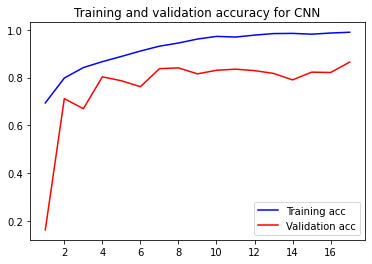

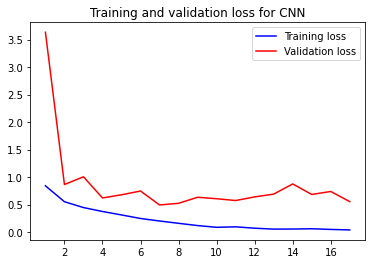

In [ ]:
#getting train and validation accuracies
train_acc_CNN = history.history['accuracy']
val_acc_CNN = history.history['val_accuracy']

#getting train and validation losses
train_loss_CNN = history.history['loss']
val_loss_CNN = history.history['val_loss']
epochs = range(1, len(train_loss_CNN) + 1)

#plotting the training and validation accurracies
plt.plot(epochs, train_acc_CNN, 'b', label='Training acc')
plt.plot(epochs, val_acc_CNN, 'r', label='Validation acc')
plt.title('Training and validation accuracy for CNN')
plt.legend()
plt.figure()

#plotting the train and validaiton losses
plt.plot(epochs, train_loss_CNN, 'b', label='Training loss')
plt.plot(epochs, val_loss_CNN, 'r', label='Validation loss')
plt.title('Training and validation loss for CNN')
plt.legend()

plt.show()

Data Augmentation didn't appear to do a lot to improve over the model. The model still over fits, the bouncing is a little less pronounced and validation accuracy moves a little more linearly with traingin accuracy.

#5. Transfer Learning Model - Resnet50

In [ ]:
#instantiate a DenseNet121 model trained on ImageNet dataset
from tensorflow.keras.applications import DenseNet121
conv_base = DenseNet121(weights='imagenet',
include_top=False,
input_shape=(150, 150, 3))

#freeze the weight of the convolutional base
conv_base.trainable=False

# get the summary of the model to view its architecture
conv_base.summary()

29084464/29084464 [==============================] - 0s 0us/step
Model: "densenet121"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 156, 156, 3)  0          ['input_6[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 75, 75, 64)   9408        ['zero_padding2d[0][0]']         
                                                                                                  
 conv1/bn (BatchNormali

In [ ]:
def build_pretrained(input_shape):

  #Configuring the model architecture

  #input layer for getting the input image
  input = keras.Input(shape=input_shape)

  #Add the data_augmentation layers here:
  x = data_augmentation(input)

  #rescaling layer for rescalign pixels to [0,1] range
  x = layers.experimental.preprocessing.Rescaling(1./255)(x)
  
  #Using the pre-trained conv_base
  x = conv_base(x)

  #Global Average pooling. This will get an input of shape (height, width, channels) the average of each feature map and returns a vector of size channels.
  x = layers.GlobalAveragePooling2D()(x)

  #The final output layer has six neurons with softmax activation to output the probability of the target class
  output=layers.Dense(6, activation="softmax")(x)
  
  #create a model and set its input and output and return it
  model = keras.Model(inputs=input, outputs=output)
  return model

pretrained_model=build_pretrained(input_shape=(150,150,3))
print(pretrained_model.summary())

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 random_flip_1 (RandomFlip)  (None, 150, 150, 3)       0         
                                                                 
 random_rotation_1 (RandomRo  (None, 150, 150, 3)      0         
 tation)                                                         
                                                                 
 random_zoom_1 (RandomZoom)  (None, 150, 150, 3)       0         
                                                                 
 rescaling_4 (Rescaling)     (None, 150, 150, 3)       0         
                                                                 
 densenet121 (Functional)    (None, 4, 4, 1024)        7037504   
                                                           

In [ ]:
#compiling the model
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-3,
    decay_steps=1000,
    decay_rate=0.9)

opt = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
pretrained_model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics=['accuracy'], optimizer=opt)

checkpoint= keras.callbacks.ModelCheckpoint( filepath="drive/MyDrive/cnn_assign3/pretrained_model_checkpoint",save_best_only=True, monitor="val_loss")

history = pretrained_model.fit(
            train_dataset,
            validation_data = validation_dataset,
            epochs = 50,
            verbose = 1,
            callbacks=[checkpoint, early_stopping])

#save history
np.save('drive/MyDrive/cnn_assign3/pretrained_model_checkpoint/history.npy', history)


Epoch 1/50
351/351 [==============================] - ETA: 0s - loss: 0.5835 - accuracy: 0.7870

351/351 [==============================] - 69s 178ms/step - loss: 0.5835 - accuracy: 0.7870 - val_loss: 0.3439 - val_accuracy: 0.8760
Epoch 2/50
350/351 [============================>.] - ETA: 0s - loss: 0.3899 - accuracy: 0.8596

351/351 [==============================] - 60s 172ms/step - loss: 0.3898 - accuracy: 0.8595 - val_loss: 0.3278 - val_accuracy: 0.8813
Epoch 3/50
351/351 [==============================] - 14s 40ms/step - loss: 0.3616 - accuracy: 0.8670 - val_loss: 0.3345 - val_accuracy: 0.8781
Epoch 4/50
351/351 [==============================] - ETA: 0s - loss: 0.3488 - accuracy: 0.8744

351/351 [==============================] - 60s 172ms/step - loss: 0.3488 - accuracy: 0.8744 - val_loss: 0.2882 - val_accuracy: 0.8981
Epoch 5/50
351/351 [==============================] - ETA: 0s - loss: 0.3272 - accuracy: 0.8805

351/351 [==============================] - 61s 173ms/step - loss: 0.3272 - accuracy: 0.8805 - val_loss: 0.2833 - val_accuracy: 0.8988
Epoch 6/50
351/351 [==============================] - ETA: 0s - loss: 0.3240 - accuracy: 0.8795

351/351 [==============================] - 61s 174ms/step - loss: 0.3240 - accuracy: 0.8795 - val_loss: 0.2811 - val_accuracy: 0.9002
Epoch 7/50
351/351 [==============================] - 14s 41ms/step - loss: 0.3193 - accuracy: 0.8839 - val_loss: 0.2947 - val_accuracy: 0.8931
Epoch 8/50
351/351 [==============================] - 14s 40ms/step - loss: 0.3167 - accuracy: 0.8849 - val_loss: 0.2884 - val_accuracy: 0.8970
Epoch 9/50
350/351 [============================>.] - ETA: 0s - loss: 0.3106 - accuracy: 0.8883

351/351 [==============================] - 61s 174ms/step - loss: 0.3106 - accuracy: 0.8883 - val_loss: 0.2741 - val_accuracy: 0.9006
Epoch 10/50
351/351 [==============================] - 14s 41ms/step - loss: 0.3063 - accuracy: 0.8845 - val_loss: 0.2883 - val_accuracy: 0.8995
Epoch 11/50
351/351 [==============================] - 14s 40ms/step - loss: 0.2995 - accuracy: 0.8881 - val_loss: 0.2864 - val_accuracy: 0.9024
Epoch 12/50
351/351 [==============================] - 14s 40ms/step - loss: 0.3043 - accuracy: 0.8898 - val_loss: 0.2925 - val_accuracy: 0.8977
Epoch 13/50
350/351 [============================>.] - ETA: 0s - loss: 0.3021 - accuracy: 0.8875

351/351 [==============================] - 61s 174ms/step - loss: 0.3019 - accuracy: 0.8875 - val_loss: 0.2669 - val_accuracy: 0.9081
Epoch 14/50
351/351 [==============================] - 15s 41ms/step - loss: 0.2951 - accuracy: 0.8901 - val_loss: 0.2838 - val_accuracy: 0.9009
Epoch 15/50
351/351 [==============================] - 14s 41ms/step - loss: 0.2970 - accuracy: 0.8891 - val_loss: 0.2747 - val_accuracy: 0.9027
Epoch 16/50
351/351 [==============================] - ETA: 0s - loss: 0.2889 - accuracy: 0.8941

351/351 [==============================] - 61s 173ms/step - loss: 0.2889 - accuracy: 0.8941 - val_loss: 0.2653 - val_accuracy: 0.9066
Epoch 17/50
351/351 [==============================] - 14s 41ms/step - loss: 0.2904 - accuracy: 0.8944 - val_loss: 0.2794 - val_accuracy: 0.9052
Epoch 18/50
351/351 [==============================] - 14s 40ms/step - loss: 0.2879 - accuracy: 0.8916 - val_loss: 0.2771 - val_accuracy: 0.9056
Epoch 19/50
351/351 [==============================] - 14s 40ms/step - loss: 0.2909 - accuracy: 0.8951 - val_loss: 0.2801 - val_accuracy: 0.9073
Epoch 20/50
351/351 [==============================] - 14s 40ms/step - loss: 0.2865 - accuracy: 0.8962 - val_loss: 0.2672 - val_accuracy: 0.9091
Epoch 21/50
351/351 [==============================] - 14s 40ms/step - loss: 0.2877 - accuracy: 0.8950 - val_loss: 0.2680 - val_accuracy: 0.9063
Epoch 22/50
351/351 [==============================] - 14s 41ms/step - loss: 0.2925 - accuracy: 0.8937 - val_loss: 0.2697 - val_accuracy: 0.9

Fine Tuning

In [ ]:
#unfreez the convolution base
conv_base.trainable = True

#set trainable to False for all layers except the last 10 , that is freeze the weights for all layers except the last 10 layers
for layer in conv_base.layers[:-10]:
    layer.trainable=False

#set trainable to True for the convolutional layers in the last 10 layers. 
for layer in conv_base.layers[-10:]:
    # we only want to unfreez the convolutional layers (batch normalizataion layers remain frozen)
    if layer.name.endswith("conv"):
      layer.trainable=True

print(pretrained_model.summary())

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 random_flip_1 (RandomFlip)  (None, 150, 150, 3)       0         
                                                                 
 random_rotation_1 (RandomRo  (None, 150, 150, 3)      0         
 tation)                                                         
                                                                 
 random_zoom_1 (RandomZoom)  (None, 150, 150, 3)       0         
                                                                 
 rescaling_4 (Rescaling)     (None, 150, 150, 3)       0         
                                                                 
 densenet121 (Functional)    (None, 4, 4, 1024)        7037504   
                                                           

In [ ]:
#compiling the model

opt = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
pretrained_model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics=['accuracy'], optimizer=opt)


history = pretrained_model.fit(
            train_dataset,
            validation_data = validation_dataset,
            epochs = 50,
            verbose = 1,
            callbacks = early_stopping)


Epoch 1/50
351/351 [==============================] - 24s 49ms/step - loss: 0.0759 - accuracy: 0.9748 - val_loss: 0.4666 - val_accuracy: 0.8959
Epoch 2/50
351/351 [==============================] - 16s 44ms/step - loss: 0.0747 - accuracy: 0.9735 - val_loss: 0.4221 - val_accuracy: 0.9084
Epoch 3/50
351/351 [==============================] - 17s 48ms/step - loss: 0.0701 - accuracy: 0.9750 - val_loss: 0.3956 - val_accuracy: 0.9123
Epoch 4/50
351/351 [==============================] - 17s 47ms/step - loss: 0.0746 - accuracy: 0.9724 - val_loss: 0.4381 - val_accuracy: 0.8909
Epoch 5/50
351/351 [==============================] - 16s 47ms/step - loss: 0.0732 - accuracy: 0.9738 - val_loss: 0.4089 - val_accuracy: 0.9038
Epoch 6/50
351/351 [==============================] - 17s 47ms/step - loss: 0.0672 - accuracy: 0.9767 - val_loss: 0.3963 - val_accuracy: 0.9170
Epoch 7/50
351/351 [==============================] - 17s 47ms/step - loss: 0.0645 - accuracy: 0.9755 - val_loss: 0.3489 - val_accuracy:

In [ ]:
#saving the model on disk
pretrained_model.save("drive/MyDrive/cnn_assign3/intel-finetuned.h5")

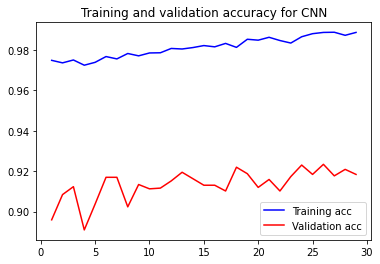

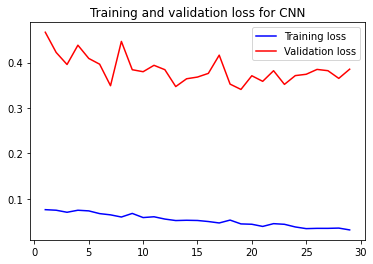

In [ ]:
#getting train and validation accuracies
train_acc_CNN = history.history['accuracy']
val_acc_CNN = history.history['val_accuracy']

#getting train and validation losses
train_loss_CNN = history.history['loss']
val_loss_CNN = history.history['val_loss']
epochs = range(1, len(train_loss_CNN) + 1)

#plotting the training and validation accurracies
plt.plot(epochs, train_acc_CNN, 'b', label='Training acc')
plt.plot(epochs, val_acc_CNN, 'r', label='Validation acc')
plt.title('Training and validation accuracy for CNN')
plt.legend()
plt.figure()

#plotting the train and validaiton losses
plt.plot(epochs, train_loss_CNN, 'b', label='Training loss')
plt.plot(epochs, val_loss_CNN, 'r', label='Validation loss')
plt.title('Training and validation loss for CNN')
plt.legend()

plt.show()

Transfer learning has increased the accuracy a few percentage points.

# 6. Testing

In [ ]:
test_dataset = image_dataset_from_directory(
"intel/seg_test",
image_size=(150, 150),
batch_size=32,
shuffle=False)

Found 3000 files belonging to 6 classes.


In [ ]:
#compute the loss and accurracy on the test set using model.evaluate method
test_loss, test_acc = pretrained_model.evaluate(test_dataset)
print('test acc:', test_acc)

94/94 [==============================] - 3s 28ms/step - loss: 0.3961 - accuracy: 0.9090
test acc: 0.9089999794960022


Test accuracy was 90%

In [ ]:
predicted_probs = pretrained_model.predict(test_dataset)
pred_class = np.argmax(predicted_probs, axis=1)
true_class_indices = np.concatenate([y for x, y in test_dataset], axis=0)


94/94 [==============================] - 4s 23ms/step


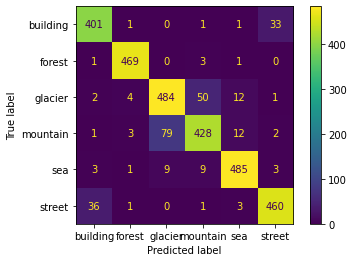

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(true_class_indices, pred_class, labels=[0,1,2,3,4,5])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["building", "forest", "glacier", "mountain", "sea", "street"])
disp.plot()
plt.show()

The model has trouble telling between glaciers and mountains; which is understandable. The model also has trouble differentiating streets from buildings, presumably because most buildings are on streets.

In [ ]:

#create a dictionary for label names.
batch_size=32
test_size=3000
batch_index=0
#Get each batch of images and labels in test dataset
for image_batch,label_batch in test_dataset:
    if batch_index>math.ceil(test_size/batch_size):
        break;
    # Get the predicted probabilities for the images in the batch. 
    y_pred = pretrained_model.predict(image_batch)
    
    
    y_pred_label = np.argmax(y_pred, axis=1)
    
     #glacier/mtn and street/building errors
    errors = np.where((y_pred_label == 0) & (label_batch ==5) | (y_pred_label == 2) & (label_batch ==3))[0]
   
  
    #display the missclassified images together with their predicted probabilities
    for i in errors:
        print(f"True label is: {label_batch[i]}, CNN predicted {y_pred_label[i]}")
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.show()
        
    #get the next batch
    batch_index=batch_index+1

The visual is as expected with the street and building confusion as almost all of those misclassifications have both items in the image. The mtn vs glacier misclassification appears to have a lot to do with snow. If there is snow on the mountain or in the picture it almost always classified it as a glacier.